### erddapy example for PMEL tools - Drifters and Alamo Floats (2018)

__pyversion__==3.6   
__author__==S.Bell

### connecting and basic information

In [1]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import datetime

server_url='http://ferret.pmel.noaa.gov/alamo/erddap'
e = ERDDAP(server=server_url)

Get only ARGOS Drifter datafiles

In [2]:
df = pd.read_csv(e.get_search_url(response='csv', search_for='alamo'))

In [3]:
argos = df['Dataset ID'].values
print(argos)

['arctic_heat_alamo_profiles_11010' 'arctic_heat_alamo_profiles_11012'
 'arctic_heat_alamo_profiles_11014' 'arctic_heat_alamo_profiles_11015'
 'arctic_heat_alamo_profiles_11016' 'arctic_heat_alamo_profiles_11018'
 'arctic_heat_alamo_profiles_9058' 'arctic_heat_alamo_profiles_9076'
 'arctic_heat_alamo_profiles_9085' 'arctic_heat_alamo_profiles_9115'
 'arctic_heat_alamo_profiles_9116' 'arctic_heat_alamo_profiles_9117'
 'arctic_heat_alamo_profiles_9119' 'arctic_heat_alamo_profiles_9121'
 'arctic_heat_alamo_profiles_9150' 'arctic_heat_alamo_profiles_9152'
 'arctic_heat_alamo_profiles_9153' 'arctic_heat_alamo_profiles_9154'
 'arctic_heat_alamo_profiles_9155' 'arctic_heat_alamo_profiles_9158'
 'arctic_heat_alamo_profiles_9164' 'arctic_heat_alamo_profiles_9165'
 'arctic_heat_alamo_profiles_9167' 'arctic_heat_alamo_profiles_9168'
 'arctic_heat_alamo_profiles_9169' 'arctic_heat_alamo_profiles_9170'
 'arctic_heat_alamo_profiles_9172' 'arctic_heat_alamo_profiles_9174'
 'arctic_heat_alamo_profiles

In [4]:
kw = {
    'standard_name': 'sea_water_temperature',
    'min_lon': -360,
    'max_lon': 540,
    'min_lat': 50.0,
    'max_lat': 90.0,
    'min_time': '2018-01-10T00:00:00Z',
    'max_time': '2019-01-10T00:00:00Z'
}

In [5]:
variables = [e.get_var_by_attr(dataset_id=float, long_name=lambda v: v is not None) for float in argos]

In [6]:
common_variables = set(variables[0])

common_variables.update(['profileid']) 
common_variables

{'CYCLE_NUMBER',
 'FLOAT_SERIAL_NO',
 'JULD_LOCATION',
 'PRES',
 'PSAL',
 'REFERENCE_DATE_TIME',
 'TEMP',
 'latitude',
 'longitude',
 'profileid',
 'time'}

In [7]:
constraints = {
    'longitude>=': kw['min_lon'],
    'longitude<=': kw['max_lon'],
    'latitude>=': kw['min_lat'],
    'latitude<=': kw['max_lat'],
    'time>=': kw['min_time'],
    'time<=': kw['max_time'],
}

download_url = e.get_download_url(
    dataset_id=argos[0],
    protocol='tabledap',
    response='csv',
    variables=common_variables,
    constraints=constraints
)

print(download_url)



http://ferret.pmel.noaa.gov/alamo/erddap/tabledap/arctic_heat_alamo_profiles_11010.csv?time,PRES,latitude,profileid,FLOAT_SERIAL_NO,CYCLE_NUMBER,JULD_LOCATION,TEMP,PSAL,longitude,REFERENCE_DATE_TIME&longitude>=-360&longitude<=540&latitude>=50.0&latitude<=90.0&time>=1515542400.0&time<=1547078400.0


In [8]:
from requests.exceptions import HTTPError

dfs = {}
for arfloat in argos:
    print(arfloat)
    try:
        e = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        e.constraints=constraints
        e.variables=common_variables
        e.dataset_id=arfloat
    except HTTPError:
        print('Failed to generate url {}'.format(alamo))
        continue
    try:
        dfs.update({arfloat: e.to_pandas(
                            index_col='time',
                            parse_dates=True,
                            skiprows=(1,)  # units information can be dropped.
                            )})
    except:
        print("No Valid Data")
        dfs.pop(arfloat, None)
        pass

arctic_heat_alamo_profiles_11010
arctic_heat_alamo_profiles_11012
arctic_heat_alamo_profiles_11014
arctic_heat_alamo_profiles_11015
arctic_heat_alamo_profiles_11016
arctic_heat_alamo_profiles_11018
arctic_heat_alamo_profiles_9058
No Valid Data
arctic_heat_alamo_profiles_9076
No Valid Data
arctic_heat_alamo_profiles_9085
No Valid Data
arctic_heat_alamo_profiles_9115
No Valid Data
arctic_heat_alamo_profiles_9116
No Valid Data
arctic_heat_alamo_profiles_9117
No Valid Data
arctic_heat_alamo_profiles_9119
No Valid Data
arctic_heat_alamo_profiles_9121
arctic_heat_alamo_profiles_9150
arctic_heat_alamo_profiles_9152
arctic_heat_alamo_profiles_9153
arctic_heat_alamo_profiles_9154
arctic_heat_alamo_profiles_9155
arctic_heat_alamo_profiles_9158
arctic_heat_alamo_profiles_9164
arctic_heat_alamo_profiles_9165
arctic_heat_alamo_profiles_9167
arctic_heat_alamo_profiles_9168
arctic_heat_alamo_profiles_9169
arctic_heat_alamo_profiles_9170
arctic_heat_alamo_profiles_9172
arctic_heat_alamo_profiles_9174


In [9]:
dfs.keys()

dict_keys(['arctic_heat_alamo_profiles_11010', 'arctic_heat_alamo_profiles_11012', 'arctic_heat_alamo_profiles_11014', 'arctic_heat_alamo_profiles_11015', 'arctic_heat_alamo_profiles_11016', 'arctic_heat_alamo_profiles_11018', 'arctic_heat_alamo_profiles_9121', 'arctic_heat_alamo_profiles_9150', 'arctic_heat_alamo_profiles_9152', 'arctic_heat_alamo_profiles_9153', 'arctic_heat_alamo_profiles_9154', 'arctic_heat_alamo_profiles_9155', 'arctic_heat_alamo_profiles_9158', 'arctic_heat_alamo_profiles_9164', 'arctic_heat_alamo_profiles_9165', 'arctic_heat_alamo_profiles_9167', 'arctic_heat_alamo_profiles_9168', 'arctic_heat_alamo_profiles_9169', 'arctic_heat_alamo_profiles_9170', 'arctic_heat_alamo_profiles_9172', 'arctic_heat_alamo_profiles_9174', 'arctic_heat_alamo_profiles_9176', 'arctic_heat_alamo_profiles_9197', 'arctic_heat_alamo_profiles_9199'])

# Using Python-GMT

In [50]:
import gmt

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import collections


In [51]:
colors = collections.OrderedDict(mcolors.CSS4_COLORS)

In [52]:
fig = gmt.Figure()

fig.coast(region=[-175, -155, 65, 75], projection='B-165/60/55/60/6i', land='lightgray', water='gray',
          frame=True,U=True)

In [55]:
#color by id for one year
count=8
used_color=[]
for df in dfs:
    if ('11010' in df) or ('9199' in df) or ('9197' in df):
        print(df)
        cmap = colors.popitem()[0]
        if cmap in ['teal','silver','rebeccapurple','olive','lime','indigo','fuchsia','crimson']:
            cmap = colors.popitem()[0]
        print(cmap)
        used_color = used_color + [cmap]
        fig.plot(x=dfs[df].longitude, y=dfs[df].latitude, color=cmap, style='p0.10')
        count+=1

arctic_heat_alamo_profiles_11010
white
arctic_heat_alamo_profiles_9197
wheat
arctic_heat_alamo_profiles_9199
violet


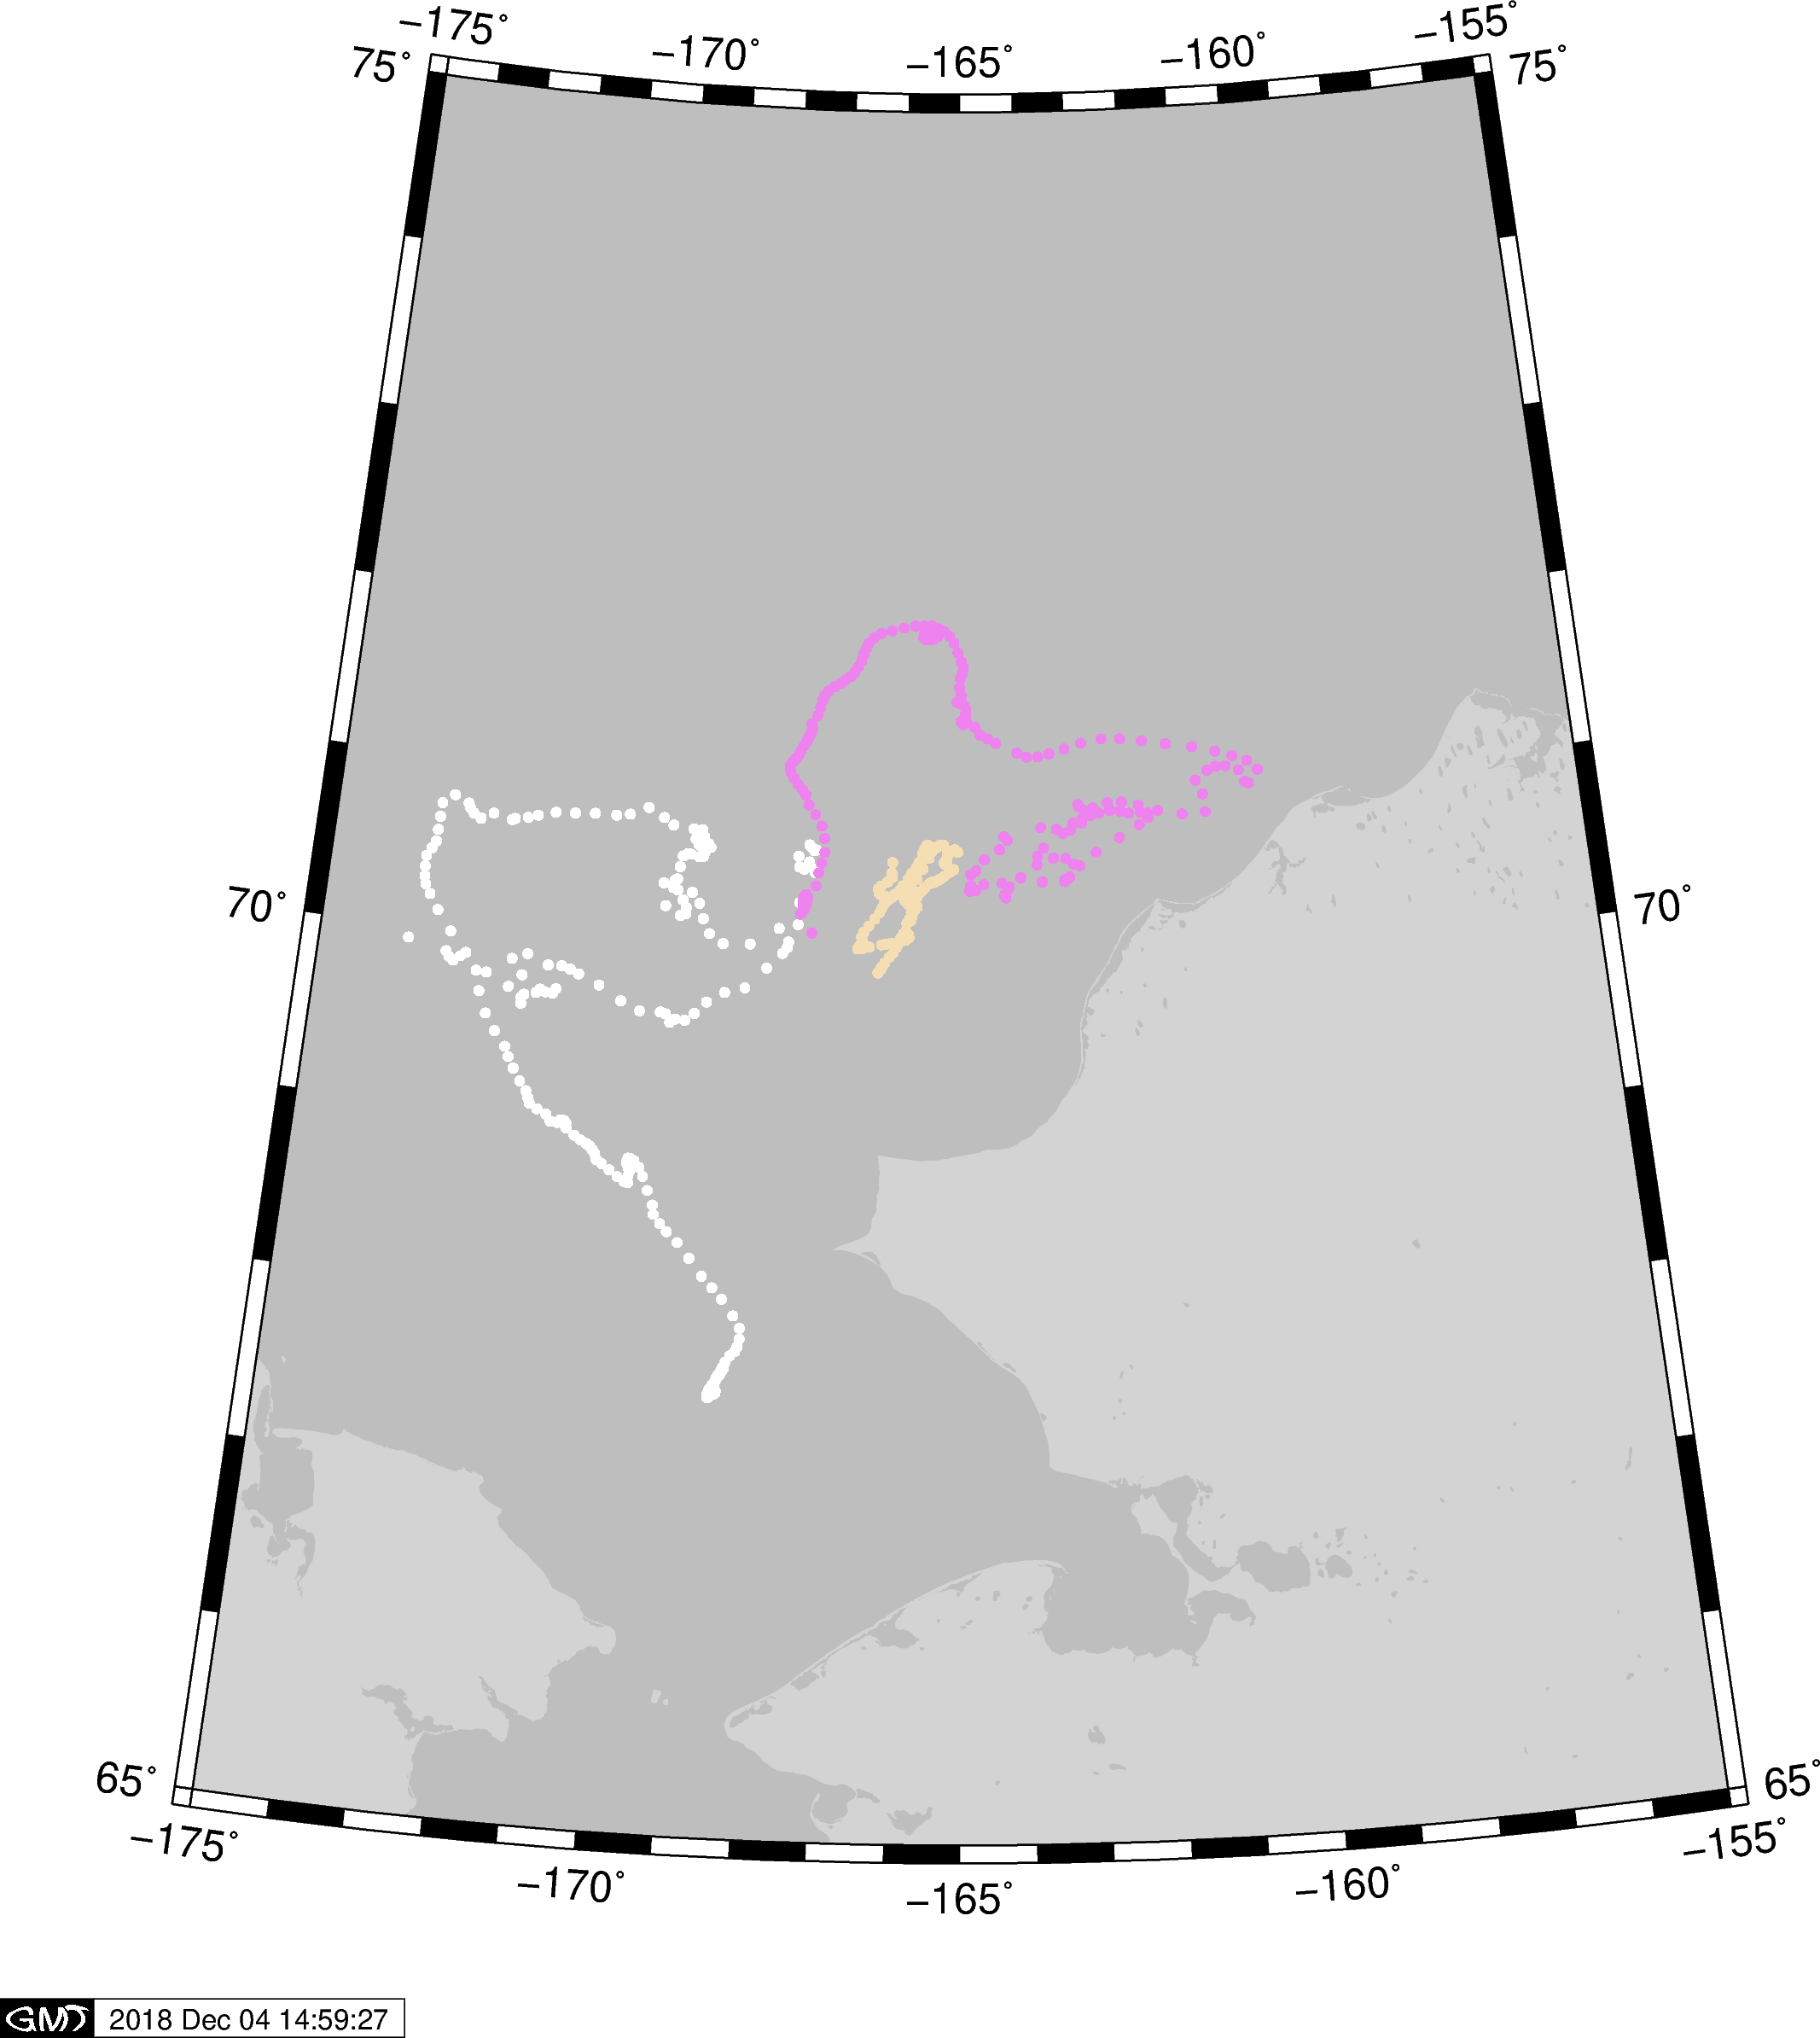

In [56]:
fig.show()

In [27]:
fig.savefig('ArcticAlamo_11010_9199_9197' + '.png')

## GMT - SST Arctic

## GMT - SST Bering

## GMT - DOY

In [57]:
#color by doy and save each days image to make a move - 7 days of data max (so its a worm)
for dstep in range(-15,160):
    count =0

    fig1 = gmt.Figure()

    fig1.coast(region=[-175, -160, 65, 75], 
           projection='B-167.5/60/55/60/6i', 
           land='lightgray', water='gray',
           frame=True)
    #choose temp boundaries
        
    for ship, df in dfs.items():
        if ('11010' in ship) or ('9199' in ship) or ('9197' in ship):
            stopdate=datetime.datetime.strftime(datetime.datetime(2018,7,1)+datetime.timedelta(days=dstep),'%Y-%m-%d')
            startdate=datetime.datetime.strftime(datetime.datetime(2018,7,1)+datetime.timedelta(days=dstep)-datetime.timedelta(days=7),'%Y-%m-%d')
            dfmiss = df[startdate:stopdate].copy()

            if not dfmiss.empty:
                print("plotting: {} {}".format(ship,startdate))
                fig1.plot(x=dfmiss.longitude, y=dfmiss.latitude, color=used_color[count], style='p0.10')
            count+=1
    print("saving")
    fig1.savefig(stopdate + '.png')

saving
saving
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-12
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-13
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-14
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-15
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-16
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-17
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-18
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-19
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-20
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-21
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-22
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-23
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-24
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-25
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-26
saving
plotting: arctic_heat_alamo_profiles_11010 2018-06-27
saving
plo

In [23]:
fig1.savefig('stopdate' + '.png')

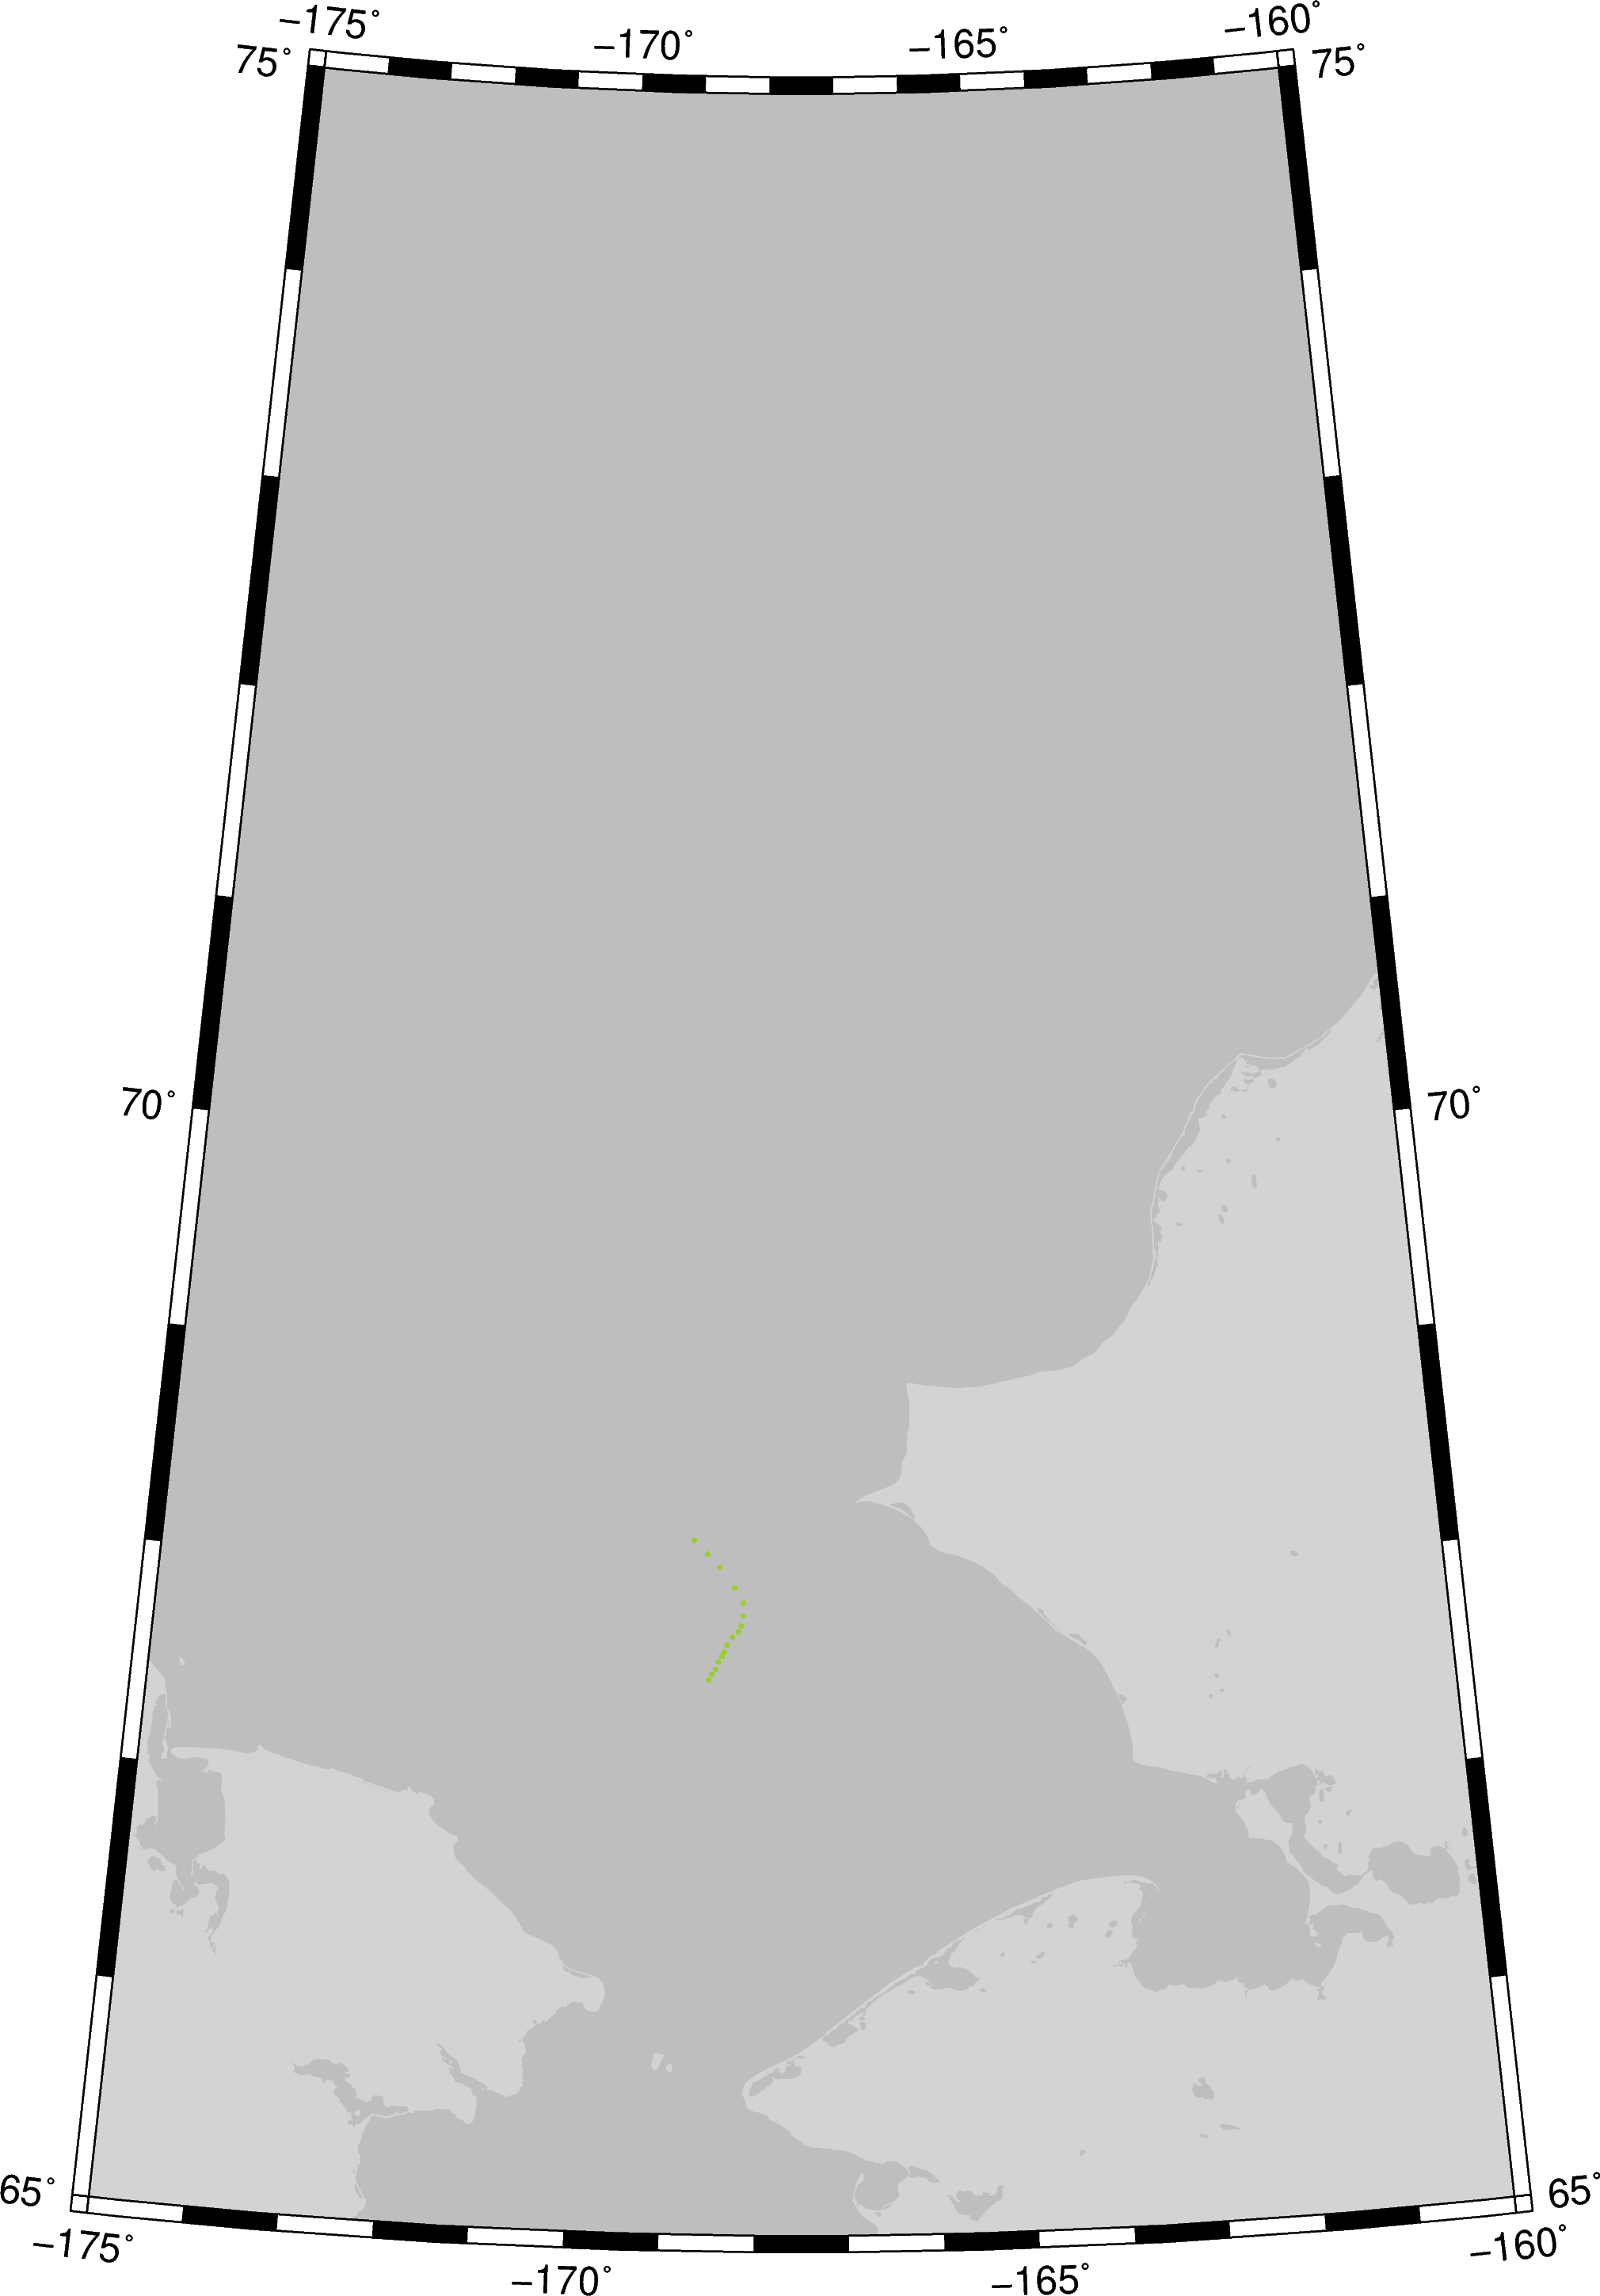

In [24]:
fig1.show()

In [28]:
!PWD

/Users/bell/Programs/Python/EcoFOCI_Jupyter_Notebooks/Arctic Heat/ALAMO Analysis
